In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

from pycaret.utils import enable_colab 
enable_colab()

     |████████████████████████████████| 256kB 5.6MB/s 
     |████████████████████████████████| 6.8MB 22.7MB/s 
     |████████████████████████████████| 266kB 53.2MB/s 
     |████████████████████████████████| 276kB 37.2MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 66.3MB 55kB/s 
     |████████████████████████████████| 1.8MB 43.8MB/s 
     |████████████████████████████████| 157.5MB 82kB/s 
     |████████████████████████████████| 1.6MB 39.8MB/s 
     |████████████████████████████████| 13.9MB 39.1MB/s 
     |████████████████████████████████| 174kB 52.1MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 604kB 50.9MB/s 
     |████████████████████████████████| 3.1MB 46.5MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 2.1MB 38.2MB/s 
     |████████████████████████████████| 337kB 39.1MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 

In [3]:
!unzip "/content/drive/My Drive/DBA3803 Project 3/Mobile Price Data.zip"

Archive:  /content/drive/My Drive/DBA3803 Project 3/Mobile Price Data.zip
  inflating: test.csv                
  inflating: train.csv               


# Data Preprocessing

In [4]:
import pandas as pd

df = pd.read_csv("/content/train.csv")

df.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [5]:
df.price_range.unique()

array([1, 2, 3, 0])

Convert to binary form

In [6]:
df.price_range = df.price_range.replace(1, 0)
df.price_range = df.price_range.replace(2, 1)
df.price_range = df.price_range.replace(3, 1)

df = df.sample(frac=1, random_state=4) # Shuffle dataset

Train - Test Split

In [7]:
split = 0.8

df_train = df.iloc[:int(len(df)*split)]

df_test = df.iloc[-(int(len(df)*(1-split))+1):]

df_test.reset_index(inplace=True, drop=True)

print(df_train.shape, df_test.shape)

(1600, 21) (400, 21)


# Model Benchmarking

In [8]:
from pycaret.classification import * 

exp_clf = setup(data = df_train, target = 'price_range', 
                numeric_features = ['fc', 'n_cores', 'sc_h', 'sc_w', 'talk_time'], 
                session_id=4331, 
                data_split_shuffle = False)

Description             Value
0                               session_id              4331
1                                   Target       price_range
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (1600, 21)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (1119, 20)
12                    Transformed Test Set         (481, 20)
13                      Shuffle Train-Test             False
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              1518
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                           Fix Imbalance             False
57                    Fix Imbalance Method             SMOTE

In [ ]:
best = compare_models(sort="AUC")

Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.9687  0.9967  0.9557  0.9819   
ada                  Ada Boost Classifier    0.9705  0.9962  0.9628  0.9786   
xgboost         Extreme Gradient Boosting    0.9670  0.9958  0.9628  0.9717   
lightgbm  Light Gradient Boosting Machine    0.9634  0.9956  0.9557  0.9718   
knn                K Neighbors Classifier    0.9741  0.9955  0.9663  0.9823   
gbc          Gradient Boosting Classifier    0.9625  0.9945  0.9628  0.9635   
lda          Linear Discriminant Analysis    0.9571  0.9933  0.9487  0.9664   
rf               Random Forest Classifier    0.9455  0.9903  0.9345  0.9574   
qda       Quadratic Discriminant Analysis    0.9428  0.9895  0.9361  0.9502   
et                 Extra Trees Classifier    0.9411  0.9891  0.9344  0.9484   
nb                            Naive Bayes    0.9330  0.9835  0.9309  0.9375   
lr                    Logistic Regression    0.9044  0.9681  0.9168  0.8974   
dt               Decision Tree Classifier    0.9303  0.9303  0.9220  0.9392   
svm                   SVM - Linear Kernel    0.7677  0.0000  0.6664  0.8805   
ridge                    Ridge Classifier    0.9562  0.0000  0.9487  0.9646   

              F1   Kappa     MCC  TT (Sec)  
catboost  0.9685  0.9375  0.9381     2.445  
ada       0.9705  0.9411  0.9415     0.146  
xgboost   0.9670  0.9339  0.9342     0.253  
lightgbm  0.9631  0.9268  0.9278     0.197  
knn       0.9740  0.9482  0.9487     0.124  
gbc       0.9629  0.9250  0.9256     0.274  
lda       0.9573  0.9142  0.9147     0.022  
rf        0.9453  0.8910  0.8922     0.559  
qda       0.9426  0.8856  0.8867     0.020  
et        0.9410  0.8821  0.8828     0.508  
nb        0.9335  0.8660  0.8673     0.019  
lr        0.9066  0.8088  0.8097     0.570  
dt        0.9299  0.8606  0.8617     0.023  
svm       0.7071  0.5373  0.5883     0.024  
ridge     0.9564  0.9125  0.9129     0.017

# Decision Tree

In [ ]:
dt = create_model('dt', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9554  0.9558  0.9298  0.9815  0.9550  0.9108  0.9121
1       0.9196  0.9198  0.9123  0.9286  0.9204  0.8393  0.8394
2       0.9643  0.9640  0.9825  0.9492  0.9655  0.9285  0.9291
3       0.9375  0.9373  0.9474  0.9310  0.9391  0.8749  0.8751
4       0.9107  0.9104  0.9298  0.8983  0.9138  0.8213  0.8218
5       0.8839  0.8839  0.8393  0.9216  0.8785  0.7679  0.7709
6       0.9107  0.9107  0.8571  0.9600  0.9057  0.8214  0.8262
7       0.9286  0.9286  0.9107  0.9444  0.9273  0.8571  0.8577
8       0.9375  0.9375  0.9464  0.9298  0.9381  0.8750  0.8751
9       0.9550  0.9549  0.9643  0.9474  0.9558  0.9099  0.9100
Mean    0.9303  0.9303  0.9220  0.9392  0.9299  0.8606  0.8617
SD      0.0235  0.0235  0.0425  0.0216  0.0251  0.0470  0.0462

In [ ]:
params = {'min_samples_leaf' : range(12,26),
          'max_depth' : range(3,7),
          'max_features' : range(10,26)}

dt = tune_model(dt, custom_grid=params, optimize = 'AUC', n_iter = 10000, search_algorithm = 'grid')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9464  0.9872  0.9474  0.9474  0.9474  0.8928  0.8928
1       0.9286  0.9872  0.9298  0.9298  0.9298  0.8571  0.8571
2       0.9643  0.9847  0.9298  1.0000  0.9636  0.9286  0.9310
3       0.9554  0.9938  0.9474  0.9643  0.9558  0.9107  0.9109
4       0.9196  0.9743  0.9474  0.9000  0.9231  0.8391  0.8403
5       0.9018  0.9625  0.8393  0.9592  0.8952  0.8036  0.8099
6       0.9018  0.9743  0.8393  0.9592  0.8952  0.8036  0.8099
7       0.9196  0.9919  0.9286  0.9123  0.9204  0.8393  0.8394
8       0.9196  0.9785  0.9107  0.9273  0.9189  0.8393  0.8394
9       0.9640  0.9971  0.9464  0.9815  0.9636  0.9279  0.9285
Mean    0.9321  0.9832  0.9166  0.9481  0.9313  0.8642  0.8659
SD      0.0226  0.0101  0.0403  0.0295  0.0243  0.0452  0.0439

In [ ]:
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=24, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4331, splitter='best')>

In [13]:
dt = create_model('dt', fold = 10, max_features = 13, min_samples_leaf=24, min_samples_split=2, max_depth=4)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9464  0.9872  0.9474  0.9474  0.9474  0.8928  0.8928
1       0.9286  0.9872  0.9298  0.9298  0.9298  0.8571  0.8571
2       0.9643  0.9847  0.9298  1.0000  0.9636  0.9286  0.9310
3       0.9554  0.9938  0.9474  0.9643  0.9558  0.9107  0.9109
4       0.9196  0.9743  0.9474  0.9000  0.9231  0.8391  0.8403
5       0.9018  0.9625  0.8393  0.9592  0.8952  0.8036  0.8099
6       0.9018  0.9743  0.8393  0.9592  0.8952  0.8036  0.8099
7       0.9196  0.9919  0.9286  0.9123  0.9204  0.8393  0.8394
8       0.9196  0.9785  0.9107  0.9273  0.9189  0.8393  0.8394
9       0.9640  0.9971  0.9464  0.9815  0.9636  0.9279  0.9285
Mean    0.9321  0.9832  0.9166  0.9481  0.9313  0.8642  0.8659
SD      0.0226  0.0101  0.0403  0.0295  0.0243  0.0452  0.0439

In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Adaboost

In [ ]:
ada = create_model('ada', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9732  0.9984  0.9825  0.9655  0.9739  0.9464  0.9465
1       0.9554  0.9952  0.9474  0.9643  0.9558  0.9107  0.9109
2       0.9732  0.9990  0.9649  0.9821  0.9735  0.9464  0.9466
3       0.9732  0.9994  0.9474  1.0000  0.9730  0.9465  0.9478
4       0.9821  0.9919  0.9825  0.9825  0.9825  0.9643  0.9643
5       0.9554  0.9850  0.9643  0.9474  0.9558  0.9107  0.9109
6       0.9375  0.9952  0.9107  0.9623  0.9358  0.8750  0.8763
7       0.9821  0.9997  0.9643  1.0000  0.9818  0.9643  0.9649
8       0.9732  0.9984  0.9643  0.9818  0.9730  0.9464  0.9466
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9705  0.9962  0.9628  0.9786  0.9705  0.9411  0.9415
SD      0.0165  0.0045  0.0231  0.0174  0.0168  0.0330  0.0328

In [ ]:
params = {"n_estimators": range(50,200,20), "learning_rate": np.linspace(0.001, 1, 50)}

ada = tune_model(ada, custom_grid=params, optimize = 'AUC', n_iter = 10000, search_algorithm = 'grid')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9643  0.9987  0.9825  0.9492  0.9655  0.9285  0.9291
1       0.9554  0.9949  0.9298  0.9815  0.9550  0.9108  0.9121
2       0.9911  0.9994  1.0000  0.9828  0.9913  0.9821  0.9823
3       0.9732  0.9994  0.9649  0.9821  0.9735  0.9464  0.9466
4       0.9821  0.9952  0.9825  0.9825  0.9825  0.9643  0.9643
5       0.9643  0.9860  0.9821  0.9483  0.9649  0.9286  0.9292
6       0.9464  0.9981  0.9107  0.9808  0.9444  0.8929  0.8951
7       0.9821  0.9994  0.9643  1.0000  0.9818  0.9643  0.9649
8       0.9821  0.9987  1.0000  0.9655  0.9825  0.9643  0.9649
9       0.9820  1.0000  0.9643  1.0000  0.9818  0.9640  0.9646
Mean    0.9723  0.9970  0.9681  0.9773  0.9723  0.9446  0.9453
SD      0.0135  0.0040  0.0273  0.0171  0.0139  0.0270  0.0265

In [ ]:
ada.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.8368979591836735, n_estimators=190,
                   random_state=4331)>

In [9]:
ada = create_model('ada', fold = 10, learning_rate = 0.8422631578947368, n_estimators=150)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9643  0.9987  0.9825  0.9492  0.9655  0.9285  0.9291
1       0.9732  0.9955  0.9649  0.9821  0.9735  0.9464  0.9466
2       0.9911  1.0000  1.0000  0.9828  0.9913  0.9821  0.9823
3       0.9732  0.9984  0.9649  0.9821  0.9735  0.9464  0.9466
4       0.9821  0.9939  0.9825  0.9825  0.9825  0.9643  0.9643
5       0.9554  0.9869  0.9643  0.9474  0.9558  0.9107  0.9109
6       0.9554  0.9981  0.9286  0.9811  0.9541  0.9107  0.9120
7       0.9911  0.9997  0.9821  1.0000  0.9910  0.9821  0.9823
8       0.9732  0.9987  0.9821  0.9649  0.9735  0.9464  0.9466
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9759  0.9970  0.9752  0.9772  0.9761  0.9518  0.9521
SD      0.0144  0.0038  0.0198  0.0173  0.0145  0.0289  0.0286

In [ ]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Random Forest

In [ ]:
rf = create_model('rf', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9914  0.8947  0.9808  0.9358  0.8752  0.8787
1       0.9464  0.9906  0.9298  0.9636  0.9464  0.8929  0.8935
2       0.9554  0.9922  0.9474  0.9643  0.9558  0.9107  0.9109
3       0.9643  0.9978  0.9474  0.9818  0.9643  0.9286  0.9292
4       0.9286  0.9864  0.9649  0.9016  0.9322  0.8569  0.8591
5       0.9464  0.9896  0.9464  0.9464  0.9464  0.8929  0.8929
6       0.8929  0.9746  0.8571  0.9231  0.8889  0.7857  0.7877
7       0.9643  0.9931  0.9464  0.9815  0.9636  0.9286  0.9292
8       0.9464  0.9900  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.9730  0.9977  0.9464  1.0000  0.9725  0.9460  0.9474
Mean    0.9455  0.9903  0.9345  0.9574  0.9453  0.8910  0.8922
SD      0.0216  0.0062  0.0319  0.0295  0.0224  0.0433  0.0428

In [ ]:
params = {"max_depth": range(3,12),
          "min_samples_split": range(1,5),
          "min_samples_leaf": range(1,5),
          "class_weight": ["balanced"],
          "n_estimators": [1000]}

rf = tune_model(rf, custom_grid=params, optimize = 'AUC', n_iter = 10000, search_algorithm = 'grid')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9917  0.8947  0.9808  0.9358  0.8752  0.8787
1       0.9375  0.9895  0.9298  0.9464  0.9381  0.8750  0.8751
2       0.9375  0.9936  0.9474  0.9310  0.9391  0.8749  0.8751
3       0.9643  0.9978  0.9474  0.9818  0.9643  0.9286  0.9292
4       0.9286  0.9895  0.9649  0.9016  0.9322  0.8569  0.8591
5       0.9643  0.9895  0.9643  0.9643  0.9643  0.9286  0.9286
6       0.8929  0.9790  0.8571  0.9231  0.8889  0.7857  0.7877
7       0.9643  0.9936  0.9464  0.9815  0.9636  0.9286  0.9292
8       0.9464  0.9882  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.9640  0.9981  0.9464  0.9815  0.9636  0.9279  0.9285
Mean    0.9437  0.9910  0.9363  0.9523  0.9437  0.8874  0.8885
SD      0.0215  0.0052  0.0330  0.0281  0.0222  0.0430  0.0424

In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=4331, verbose=0,
                       warm_start=False)>

In [10]:
rf = create_model('rf', fold = 10, max_depth = 9, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, class_weight='balanced')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9917  0.8947  0.9808  0.9358  0.8752  0.8787
1       0.9375  0.9895  0.9298  0.9464  0.9381  0.8750  0.8751
2       0.9375  0.9936  0.9474  0.9310  0.9391  0.8749  0.8751
3       0.9643  0.9978  0.9474  0.9818  0.9643  0.9286  0.9292
4       0.9286  0.9895  0.9649  0.9016  0.9322  0.8569  0.8591
5       0.9643  0.9895  0.9643  0.9643  0.9643  0.9286  0.9286
6       0.8929  0.9790  0.8571  0.9231  0.8889  0.7857  0.7877
7       0.9643  0.9936  0.9464  0.9815  0.9636  0.9286  0.9292
8       0.9464  0.9882  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.9640  0.9981  0.9464  0.9815  0.9636  0.9279  0.9285
Mean    0.9437  0.9910  0.9363  0.9523  0.9437  0.8874  0.8885
SD      0.0215  0.0052  0.0330  0.0281  0.0222  0.0430  0.0424

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Logistic Regression

In [ ]:
lr = create_model('lr', fold = 10, random_state=4331, max_iter=10000)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9821  1.0000  1.0000  0.9661  0.9828  0.9643  0.9649
1       0.9911  0.9990  1.0000  0.9828  0.9913  0.9821  0.9823
2       0.9821  0.9990  0.9649  1.0000  0.9821  0.9643  0.9649
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9732  0.9994  1.0000  0.9492  0.9739  0.9464  0.9478
6       0.9911  1.0000  0.9821  1.0000  0.9910  0.9821  0.9823
7       0.9911  0.9994  0.9821  1.0000  0.9910  0.9821  0.9823
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9911  0.9997  0.9929  0.9898  0.9912  0.9821  0.9824
SD      0.0089  0.0004  0.0117  0.0173  0.0087  0.0179  0.0175

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4331, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
lr.coef_

array([[ 1.72911131e-03, -7.46336694e-01, -1.71082980e-02,
        -2.65402387e-02, -4.13361478e-01, -2.65684050e-02,
        -1.30814171e-01, -5.32594221e-02,  1.22235885e-03,
         3.59344443e-04,  4.19660462e-03, -1.50053707e-01,
        -2.55420437e-03, -9.74921759e-02, -3.43353594e-01,
        -2.43412235e-01, -6.94703985e-01, -3.54232557e-01,
        -6.08224985e-01, -4.79665114e-01]])

In [ ]:
import numpy as np

params = {"C":np.linspace(0.0001,1,50), "penalty":['l1'], 'max_iter':[5000], 'solver':['liblinear']}

lr = tune_model(lr, custom_grid=params, optimize = 'AUC', n_iter = 10000, search_algorithm = 'grid')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9911  1.0000  0.9818  1.0000  0.9908  0.9821  0.9823
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9821  0.9994  0.9636  1.0000  0.9815  0.9643  0.9649
3       0.9643  0.9987  0.9636  0.9636  0.9636  0.9285  0.9285
4       0.9911  1.0000  1.0000  0.9821  0.9910  0.9821  0.9823
5       0.9821  0.9997  1.0000  0.9649  0.9821  0.9643  0.9649
6       0.9911  0.9997  1.0000  0.9821  0.9910  0.9821  0.9823
7       0.9821  0.9997  0.9818  0.9818  0.9818  0.9643  0.9643
8       0.9821  0.9984  0.9818  0.9818  0.9818  0.9643  0.9643
9       0.9730  0.9981  0.9818  0.9643  0.9730  0.9460  0.9461
Mean    0.9839  0.9994  0.9855  0.9821  0.9837  0.9678  0.9680
SD      0.0096  0.0007  0.0136  0.0138  0.0098  0.0193  0.0193

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4331, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

L2 Penalty (After Hyperparams Tuning)

In [ ]:
lr = create_model('lr', C=1, max_iter=10000, penalty='l2', solver='lbfgs', random_state=4331)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9821  1.0000  1.0000  0.9661  0.9828  0.9643  0.9649
1       0.9911  0.9990  1.0000  0.9828  0.9913  0.9821  0.9823
2       0.9821  0.9990  0.9649  1.0000  0.9821  0.9643  0.9649
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9732  0.9994  1.0000  0.9492  0.9739  0.9464  0.9478
6       0.9911  1.0000  0.9821  1.0000  0.9910  0.9821  0.9823
7       0.9911  0.9994  0.9821  1.0000  0.9910  0.9821  0.9823
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9911  0.9997  0.9929  0.9898  0.9912  0.9821  0.9824
SD      0.0089  0.0004  0.0117  0.0173  0.0087  0.0179  0.0175

In [ ]:
lr.coef_

array([[ 0.00748615, -0.33493478, -0.05282827, -0.00680386,  0.43633735,
        -0.01736639,  0.01807968,  0.03640944,  0.00356672,  0.00442152,
         0.01193335, -0.01006684,  0.00751915, -0.00453788,  0.63097801,
        -0.39664082, -0.19019101,  0.93541729, -0.45795586, -0.38335587]])

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

L1 Penalty (After Hyperparams Tuning)

In [11]:
lr = create_model('lr', C=1.0, max_iter=10000, solver='liblinear', penalty='l1', random_state=4331)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9911  0.9978  1.0000  0.9828  0.9913  0.9821  0.9823
2       0.9911  1.0000  0.9825  1.0000  0.9912  0.9821  0.9823
3       0.9911  0.9997  0.9825  1.0000  0.9912  0.9821  0.9823
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9821  0.9978  0.9643  1.0000  0.9818  0.9643  0.9649
6       0.9821  0.9997  0.9821  0.9821  0.9821  0.9643  0.9643
7       0.9732  0.9990  0.9643  0.9818  0.9730  0.9464  0.9466
8       0.9911  1.0000  0.9821  1.0000  0.9910  0.9821  0.9823
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9902  0.9994  0.9858  0.9947  0.9902  0.9804  0.9805
SD      0.0084  0.0009  0.0133  0.0081  0.0085  0.0168  0.0168

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr.coef_

array([[ 0.00783836, -0.0381828 , -0.02834683, -0.00148593, -0.37703326,
        -0.01695896,  0.00345065,  0.03278522,  0.00383095,  0.00473516,
         0.01245678, -0.00353564,  0.        ,  0.00708356,  0.        ,
         0.18608568, -0.49110742,  0.        , -0.23057659, -0.50627821]])

Feature Engineering

In [ ]:
from pycaret.classification import * 

feature_data = setup(data = df_train, target = 'price_range', 
                     numeric_features = ['fc', 'n_cores', 'sc_h', 'sc_w', 'talk_time'], 
                     feature_interaction=True, 
                     feature_ratio=True, 
                     session_id=4331,
                     data_split_shuffle = False)

Description             Value
0                               session_id              4331
1                                   Target       price_range
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (1600, 21)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (1119, 28)
12                    Transformed Test Set         (481, 28)
13                      Shuffle Train-Test             False
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7c39
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52            Features Selection Threshold              None
53                     Feature Interaction              True
54                           Feature Ratio              True
55                   Interaction Threshold              0.01
56                           Fix Imbalance             False
57                    Fix Imbalance Method             SMOTE

In [ ]:
feature_data[2]

battery_power  clock_speed  ...  ram_divide_mobile_wt  ram_multiply_mobile_wt
1893          721.0          2.7  ...             35.352940                367812.0
898          1372.0          2.7  ...              3.756477                139925.0
1578         1856.0          0.5  ...             13.238709                318060.0
559          1191.0          2.4  ...              6.082840                173732.0
88            668.0          0.5  ...             17.716129                425630.0
...             ...          ...  ...                   ...                     ...
1473          541.0          1.0  ...              8.023623                129413.0
1385         1805.0          0.5  ...              7.010989                232232.0
978          1359.0          0.6  ...             36.534885                270212.0
784          1892.0          0.7  ...             19.745455                238920.0
1225          721.0          0.5  ...              2.731959                102820.0

[1600 rows x 28 columns]

In [ ]:
# feature_data[2].to_csv("/content/drive/My Drive/DBA3803 Project 3/feature interaction terms")

In [ ]:
feature_df = pd.read_csv("/content/drive/My Drive/DBA3803 Project 3/feature interaction terms", index_col=0)
feature_df 

battery_power  clock_speed  ...  ram_divide_mobile_wt  ram_multiply_mobile_wt
1893          721.0          2.7  ...             35.352940                367812.0
898          1372.0          2.7  ...              3.756477                139925.0
1578         1856.0          0.5  ...             13.238709                318060.0
559          1191.0          2.4  ...              6.082840                173732.0
88            668.0          0.5  ...             17.716130                425630.0
...             ...          ...  ...                   ...                     ...
1473          541.0          1.0  ...              8.023623                129413.0
1385         1805.0          0.5  ...              7.010989                232232.0
978          1359.0          0.6  ...             36.534885                270212.0
784          1892.0          0.7  ...             19.745455                238920.0
1225          721.0          0.5  ...              2.731959                102820.0

[1600 rows x 28 columns]

In [ ]:
feature_df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'blue_0', 'dual_sim_0', 'four_g_1', 'three_g_0',
       'touch_screen_1', 'wifi_1', 'ram_multiply_battery_power',
       'battery_power_multiply_ram', 'ram_multiply_px_width',
       'ram_multiply_px_height', 'mobile_wt_multiply_ram',
       'ram_divide_battery_power', 'ram_divide_mobile_wt',
       'ram_multiply_mobile_wt'],
      dtype='object')

In [ ]:
lr = create_model('lr', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9554  0.9901  0.9649  0.9483  0.9565  0.9107  0.9108
1       0.9375  0.9907  0.9298  0.9464  0.9381  0.8750  0.8751
2       0.9196  0.9850  0.9298  0.9138  0.9217  0.8392  0.8393
3       0.9554  0.9952  0.9649  0.9483  0.9565  0.9107  0.9108
4       0.9464  0.9939  0.9649  0.9322  0.9483  0.8928  0.8933
5       0.9286  0.9796  0.9464  0.9138  0.9298  0.8571  0.8577
6       0.9464  0.9828  0.9464  0.9464  0.9464  0.8929  0.8929
7       0.9554  0.9860  0.9464  0.9636  0.9550  0.9107  0.9109
8       0.9286  0.9895  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.9550  0.9942  0.9107  1.0000  0.9533  0.9100  0.9137
Mean    0.9428  0.9887  0.9433  0.9441  0.9434  0.8856  0.8862
SD      0.0127  0.0050  0.0175  0.0240  0.0123  0.0254  0.0258

In [ ]:
import numpy as np

params = {"C":np.linspace(0.001,1,50), "penalty":['l1'], 'max_iter':[5000], 'solver':['liblinear']}

lr = tune_model(lr, custom_grid=params, optimize = 'AUC', n_iter = 10000, search_algorithm = 'grid')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9464  0.9959  0.9649  0.9322  0.9483  0.8928  0.8933
1       0.9732  0.9971  0.9649  0.9821  0.9735  0.9464  0.9466
2       0.9732  0.9990  0.9649  0.9821  0.9735  0.9464  0.9466
3       0.9911  1.0000  1.0000  0.9828  0.9913  0.9821  0.9823
4       0.9732  0.9994  1.0000  0.9500  0.9744  0.9464  0.9477
5       0.9464  0.9850  0.9464  0.9464  0.9464  0.8929  0.8929
6       0.9732  0.9990  0.9643  0.9818  0.9730  0.9464  0.9466
7       0.9643  0.9971  0.9643  0.9643  0.9643  0.9286  0.9286
8       0.9911  0.9987  0.9821  1.0000  0.9910  0.9821  0.9823
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9732  0.9971  0.9752  0.9722  0.9736  0.9464  0.9467
SD      0.0169  0.0042  0.0181  0.0218  0.0167  0.0339  0.0338

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4331, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
lr = create_model(lr, C=1, max_iter=10000, solver='liblinear', penalty='l1', random_state=4331)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9643  0.9965  0.9649  0.9649  0.9649  0.9285  0.9285
1       0.9732  0.9971  0.9649  0.9821  0.9735  0.9464  0.9466
2       0.9732  0.9987  0.9649  0.9821  0.9735  0.9464  0.9466
3       0.9911  1.0000  1.0000  0.9828  0.9913  0.9821  0.9823
4       0.9732  0.9994  1.0000  0.9500  0.9744  0.9464  0.9477
5       0.9464  0.9847  0.9464  0.9464  0.9464  0.8929  0.8929
6       0.9732  0.9990  0.9643  0.9818  0.9730  0.9464  0.9466
7       0.9643  0.9978  0.9643  0.9643  0.9643  0.9286  0.9286
8       0.9911  0.9987  0.9821  1.0000  0.9910  0.9821  0.9823
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9750  0.9972  0.9752  0.9754  0.9752  0.9500  0.9502
SD      0.0148  0.0043  0.0181  0.0176  0.0148  0.0297  0.0297

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr.coef_

array([[ 8.84492426e-04, -4.79511431e-02, -2.91905502e-02,
         5.23535178e-03, -7.36350340e-01, -1.29337180e-01,
         6.86965749e-02,  2.95043391e-02,  7.81300225e-03,
        -3.14861049e-04, -1.07237851e-03, -4.32667258e-02,
         2.03978609e-02,  8.07533506e-03,  0.00000000e+00,
         1.45534951e-01, -5.71986080e-01,  0.00000000e+00,
        -2.84884351e-01, -8.53054887e-01, -1.78410144e-06,
         2.53149567e-06,  2.36258390e-05,  2.79322917e-06,
         2.19263637e-05,  2.59430518e-06,  1.32442124e+00,
        -8.98781276e-02]])

# Benefit Structure

In [ ]:
lr = create_model('lr', C=1.0, max_iter=10000, solver='liblinear', penalty='l1', random_state=4331)

# optimize threshold for trained model
optimize_threshold(lr, true_positive = 150, false_positive = -150 , false_negative = 100)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9911  0.9978  1.0000  0.9828  0.9913  0.9821  0.9823
2       0.9911  1.0000  0.9825  1.0000  0.9912  0.9821  0.9823
3       0.9911  0.9997  0.9825  1.0000  0.9912  0.9821  0.9823
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9821  0.9978  0.9643  1.0000  0.9818  0.9643  0.9649
6       0.9821  0.9997  0.9821  0.9821  0.9821  0.9643  0.9643
7       0.9732  0.9990  0.9643  0.9818  0.9730  0.9464  0.9466
8       0.9911  1.0000  0.9821  1.0000  0.9910  0.9821  0.9823
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9902  0.9994  0.9858  0.9947  0.9902  0.9804  0.9805
SD      0.0084  0.0009  0.0133  0.0081  0.0085  0.0168  0.0168

Optimized Probability Threshold: 0.48 | Optimized Cost Function: 34850


0.48

# Evaluation on Test Set

In [ ]:
lr = finalize_model(lr) # Train on 100% of data

In [ ]:
# predict on test set
predictions = predict_model(lr, data = df_test)

In [ ]:
predictions

battery_power  blue  clock_speed  ...  price_range  Label   Score
0             1753     0          0.5  ...            1      1  0.8372
1             1811     1          2.5  ...            1      1  0.9999
2              694     1          1.8  ...            1      1  1.0000
3              578     1          2.6  ...            0      0  1.0000
4             1686     1          0.5  ...            0      0  1.0000
..             ...   ...          ...  ...          ...    ...     ...
395            569     1          2.5  ...            0      0  0.9111
396           1640     1          0.7  ...            0      0  1.0000
397           1469     0          2.1  ...            0      0  1.0000
398            534     0          0.5  ...            1      1  1.0000
399           1923     0          1.0  ...            1      1  0.9840

[400 rows x 23 columns]

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

y_test = predictions.price_range
y_pred = predictions.Label

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
sensitivity = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(f'ROC AUC Score = {roc_auc}\n')
print(f'Accuracy = {accuracy}')
print('Precision = {:.2f}'.format(precision))
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}\n')
print(confusion)

ROC AUC Score = 0.99

Accuracy = 0.99
Precision = 0.98
Sensitivity = 1.0
Specificity = 0.98

[[196   4]
 [  0 200]]


# Voting Classifier

In [ ]:
# train a voting classifier on specific models
blender_specific = blend_models(estimator_list = [dt,lr], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9643  0.9984  0.9649  0.9649  0.9649  0.9285  0.9285
1       0.9732  0.9968  0.9649  0.9821  0.9735  0.9464  0.9466
2       0.9732  0.9990  0.9474  1.0000  0.9730  0.9465  0.9478
3       0.9821  0.9997  0.9825  0.9825  0.9825  0.9643  0.9643
4       0.9554  0.9965  0.9825  0.9333  0.9573  0.9106  0.9119
5       0.9643  0.9936  0.9643  0.9643  0.9643  0.9286  0.9286
6       0.9464  0.9949  0.9286  0.9630  0.9455  0.8929  0.8934
7       0.9643  0.9965  0.9643  0.9643  0.9643  0.9286  0.9286
8       0.9643  0.9978  0.9643  0.9643  0.9643  0.9286  0.9286
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9688  0.9973  0.9664  0.9719  0.9689  0.9375  0.9378
SD      0.0140  0.0020  0.0186  0.0189  0.0140  0.0280  0.0278

# Stacknet

In [12]:
catboost = create_model('catboost', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9732  0.9971  0.9649  0.9821  0.9735  0.9464  0.9466
1       0.9464  0.9933  0.9298  0.9636  0.9464  0.8929  0.8935
2       0.9732  0.9990  0.9474  1.0000  0.9730  0.9465  0.9478
3       0.9821  1.0000  0.9649  1.0000  0.9821  0.9643  0.9649
4       0.9911  0.9974  1.0000  0.9828  0.9913  0.9821  0.9823
5       0.9643  0.9936  0.9643  0.9643  0.9643  0.9286  0.9286
6       0.9375  0.9920  0.9107  0.9623  0.9358  0.8750  0.8763
7       0.9732  0.9974  0.9464  1.0000  0.9725  0.9464  0.9478
8       0.9643  0.9971  0.9643  0.9643  0.9643  0.9286  0.9286
9       0.9820  1.0000  0.9643  1.0000  0.9818  0.9640  0.9646
Mean    0.9687  0.9967  0.9557  0.9819  0.9685  0.9375  0.9381
SD      0.0156  0.0027  0.0228  0.0163  0.0159  0.0312  0.0310

In [14]:
stacker = stack_models(estimator_list = [dt,lr,rf,ada], meta_model = catboost)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9911  1.0000  1.0000  0.9828  0.9913  0.9821  0.9823
1       0.9911  0.9968  1.0000  0.9828  0.9913  0.9821  0.9823
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9911  0.9997  0.9825  1.0000  0.9912  0.9821  0.9823
4       0.9911  1.0000  1.0000  0.9828  0.9913  0.9821  0.9823
5       0.9821  0.9965  0.9643  1.0000  0.9818  0.9643  0.9649
6       0.9911  1.0000  1.0000  0.9825  0.9912  0.9821  0.9823
7       0.9732  0.9990  0.9643  0.9818  0.9730  0.9464  0.9466
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9911  0.9992  0.9911  0.9913  0.9911  0.9821  0.9823
SD      0.0080  0.0013  0.0144  0.0087  0.0081  0.0160  0.0159

# Multi-Class

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train.csv")

df.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [ ]:
df.price_range.unique()

array([1, 2, 3, 0])

Model Benchmarking

In [ ]:
from pycaret.classification import * 

exp_clf = setup(data = df, target = 'price_range', 
                numeric_features = ['fc', 'n_cores', 'sc_h', 'sc_w', 'talk_time'], 
                session_id=4331, 
                data_split_shuffle = False)

Description                   Value
0                               session_id                    4331
1                                   Target             price_range
2                              Target Type              Multiclass
3                            Label Encoded  0: 0, 1: 1, 2: 2, 3: 3
4                            Original Data              (2000, 21)
5                           Missing Values                   False
6                         Numeric Features                      14
7                     Categorical Features                       6
8                         Ordinal Features                   False
9                High Cardinality Features                   False
10                 High Cardinality Method                    None
11                   Transformed Train Set              (1399, 20)
12                    Transformed Test Set               (601, 20)
13                      Shuffle Train-Test                   False
14                     Stratify Train-Test                   False
15                          Fold Generator         StratifiedKFold
16                             Fold Number                      10
17                                CPU Jobs                      -1
18                                 Use GPU                   False
19                          Log Experiment                   False
20                         Experiment Name        clf-default-name
21                                     USI                    dde8
22                         Imputation Type                  simple
23          Iterative Imputation Iteration                    None
24                         Numeric Imputer                    mean
25      Iterative Imputation Numeric Model                    None
26                     Categorical Imputer                constant
27  Iterative Imputation Categorical Model                    None
28           Unknown Categoricals Handling          least_frequent
29                               Normalize                   False
30                        Normalize Method                    None
31                          Transformation                   False
32                   Transformation Method                    None
33                                     PCA                   False
34                              PCA Method                    None
35                          PCA Components                    None
36                     Ignore Low Variance                   False
37                     Combine Rare Levels                   False
38                    Rare Level Threshold                    None
39                         Numeric Binning                   False
40                         Remove Outliers                   False
41                      Outliers Threshold                    None
42                Remove Multicollinearity                   False
43             Multicollinearity Threshold                    None
44                              Clustering                   False
45                    Clustering Iteration                    None
46                     Polynomial Features                   False
47                       Polynomial Degree                    None
48                    Trignometry Features                   False
49                    Polynomial Threshold                    None
50                          Group Features                   False
51                       Feature Selection                   False
52            Features Selection Threshold                    None
53                     Feature Interaction                   False
54                           Feature Ratio                   False
55                   Interaction Threshold                    None
56                           Fix Imbalance                   False
57                    Fix Imbalance Method                   SMOTE

In [ ]:
best = compare_models(sort="AUC")

Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.9343  0.9949  0.9342  0.9355   
lda          Linear Discriminant Analysis    0.9400  0.9948  0.9400  0.9423   
qda       Quadratic Discriminant Analysis    0.9157  0.9924  0.9154  0.9167   
knn                K Neighbors Classifier    0.9285  0.9908  0.9284  0.9302   
xgboost         Extreme Gradient Boosting    0.9171  0.9903  0.9171  0.9183   
lightgbm  Light Gradient Boosting Machine    0.9028  0.9895  0.9026  0.9049   
gbc          Gradient Boosting Classifier    0.8985  0.9865  0.8982  0.9012   
rf               Random Forest Classifier    0.8756  0.9758  0.8754  0.8776   
et                 Extra Trees Classifier    0.8549  0.9665  0.8545  0.8564   
nb                            Naive Bayes    0.8042  0.9514  0.8033  0.8086   
ada                  Ada Boost Classifier    0.6920  0.9180  0.6921  0.7664   
lr                    Logistic Regression    0.7112  0.9091  0.7104  0.7149   
dt               Decision Tree Classifier    0.8127  0.8751  0.8125  0.8140   
svm                   SVM - Linear Kernel    0.4883  0.0000  0.4864  0.4731   
ridge                    Ridge Classifier    0.6104  0.0000  0.6057  0.6514   

              F1   Kappa     MCC  TT (Sec)  
catboost  0.9343  0.9123  0.9127     6.050  
lda       0.9405  0.9200  0.9204     0.024  
qda       0.9153  0.8875  0.8880     0.023  
knn       0.9284  0.9047  0.9053     0.125  
xgboost   0.9168  0.8894  0.8900     1.257  
lightgbm  0.9026  0.8703  0.8711     0.366  
gbc       0.8981  0.8647  0.8657     1.364  
rf        0.8753  0.8342  0.8350     0.609  
et        0.8543  0.8065  0.8073     0.535  
nb        0.8038  0.7388  0.7404     0.023  
ada       0.6813  0.5898  0.6117     0.168  
lr        0.7105  0.6147  0.6162     0.707  
dt        0.8119  0.7502  0.7511     0.026  
svm       0.4162  0.3167  0.3743     0.067  
ridge     0.5376  0.4791  0.5231     0.022

In [ ]:
lr = create_model('lr', fold = 10, random_state=4331, max_iter=10000)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7357  0.9195  0.7361  0.7407  0.7372  0.6475  0.6481
1       0.7857  0.9435  0.7851  0.7902  0.7868  0.7141  0.7149
2       0.7214  0.9254  0.7214  0.7219  0.7208  0.6286  0.6291
3       0.7929  0.9452  0.7917  0.7998  0.7942  0.7236  0.7247
4       0.7857  0.9493  0.7836  0.7819  0.7822  0.7141  0.7150
5       0.7571  0.9392  0.7567  0.7580  0.7553  0.6760  0.6776
6       0.8071  0.9466  0.8058  0.8032  0.8036  0.7427  0.7437
7       0.7571  0.9355  0.7552  0.7581  0.7545  0.6760  0.6779
8       0.6714  0.8864  0.6709  0.6768  0.6721  0.5617  0.5627
9       0.7410  0.9347  0.7404  0.7463  0.7411  0.6547  0.6562
Mean    0.7555  0.9325  0.7547  0.7577  0.7548  0.6739  0.6750
SD      0.0384  0.0178  0.0380  0.0370  0.0377  0.0511  0.0512

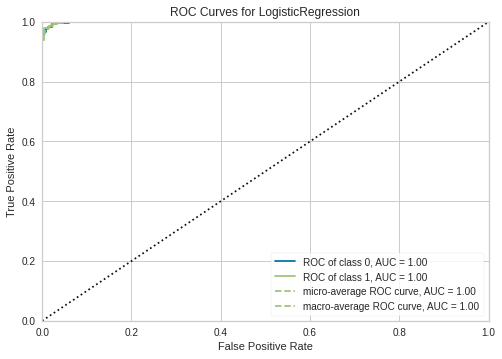

In [ ]:
evaluate_model(lr)

# Unsupervised Learning

In [ ]:
features = [f for f in df.columns if f != 'price_range']

df[features]

battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
1893            721     1          2.7  ...        1             1     1
898            1372     1          2.7  ...        1             0     0
1578           1856     0          0.5  ...        1             1     0
559            1191     0          2.4  ...        1             1     1
88              668     0          0.5  ...        1             1     1
...             ...   ...          ...  ...      ...           ...   ...
1921            569     1          2.5  ...        0             0     0
709            1640     1          0.7  ...        1             1     0
439            1469     0          2.1  ...        0             1     0
174             534     0          0.5  ...        1             0     0
1146           1923     0          1.0  ...        1             0     1

[2000 rows x 20 columns]

In [ ]:
#import clustering module
from pycaret.clustering import *

#intialize the setup
exp_clu = setup(df[features], 
                numeric_features = ['fc', 'n_cores', 'sc_h', 'sc_w', 'talk_time'], 
                session_id=4331)

Description                 Value
0                               session_id                  4331
1                            Original Data            (2000, 20)
2                           Missing Values                 False
3                         Numeric Features                    14
4                     Categorical Features                     6
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (2000, 26)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  80db
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36                              Clustering                 False
37                    Clustering Iteration                  None
38                     Polynomial Features                 False
39                       Polynomial Degree                  None
40                    Trignometry Features                 False
41                    Polynomial Threshold                  None
42                          Group Features                 False
43                       Feature Selection                 False
44            Features Selection Threshold                  None
45                     Feature Interaction                 False
46                           Feature Ratio                 False
47                   Interaction Threshold                  None

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.2662           1209.043  ...           0             0

[1 rows x 6 columns]

In [ ]:
kmeans_df = assign_model(kmeans)

kmeans_df.Cluster.value_counts(normalize=True)

Cluster 1    0.302
Cluster 0    0.300
Cluster 3    0.236
Cluster 2    0.162
Name: Cluster, dtype: float64

In [ ]:
plot_model(kmeans, 'distribution')

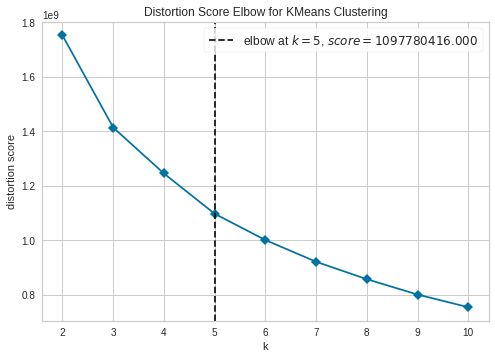

In [ ]:
plot_model(kmeans, 'elbow')

In [ ]:
plot_model(kmeans, 'cluster')

In [ ]:
plot_model(kmeans, 'tsne')